Taller 1 


Laura Hernández


Daniel Mateo Bernal


María Cristina Vidales

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as seaborn

In [ ]:
df = pd.read_csv ('archivo.csv')

#Punto 1
##Analisis explotario de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [ ]:
df=df[df['parentesco_jefe_hogar']=='jefe_hogar'].reset_index(drop=True)

In [ ]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
2,30000021,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,1050000.0
3,30000031,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,820000.0
4,30000041,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,30175011,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,9000000.0
14025,30195681,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,si,NaN,salario_independiente,NaN,828116.0
14026,30195691,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,5000000.0
14027,30195701,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0


In [ ]:
gastos_totales=['gastos_alojamiento_valor','gastos_transporte_valor','gastos_trans_publico_lugar_valor','gastos_bienes_personales_valor','gastos_regalos_valor',
              'gastos_otros_valor','gastos_transporte_aereo_valor']

In [ ]:
gastos_totales

['gastos_alojamiento_valor',
 'gastos_transporte_valor',
 'gastos_trans_publico_lugar_valor',
 'gastos_bienes_personales_valor',
 'gastos_regalos_valor',
 'gastos_otros_valor',
 'gastos_transporte_aereo_valor']

In [ ]:
df['gastos_totales'] = df.fillna(0)[gastos_totales].sum(axis=1)

In [ ]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox,gastos_totales
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0,0.0
1,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0,0.0
2,30000021,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,pension,NaN,1050000.0,0.0
3,30000031,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,820000.0,0.0
4,30000041,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,850000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,30175011,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,9000000.0,0.0
14025,30195681,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,si,NaN,salario_independiente,NaN,828116.0,0.0
14026,30195691,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,pension,NaN,5000000.0,0.0
14027,30195701,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0,0.0


In [ ]:
lista_relevantes = ['LLAVE_HOGAR','edad','parentesco_jefe_hogar','estado_civil','viaje_noche_fuera','motivo_viaje','compañía_viaje','destino_municipio',
                    'gastos_totales','estrato','num_noches','ingreso_mensual_aprox_sin_fuentes','ingreso_mensual_aprox']

In [ ]:
lista_relevantes

['LLAVE_HOGAR',
 'edad',
 'parentesco_jefe_hogar',
 'estado_civil',
 'viaje_noche_fuera',
 'motivo_viaje',
 'compañía_viaje',
 'destino_municipio',
 'gastos_totales',
 'estrato',
 'num_noches',
 'ingreso_mensual_aprox_sin_fuentes',
 'ingreso_mensual_aprox']

In [ ]:
df = df[lista_relevantes]

In [ ]:
df

,LLAVE_HOGAR,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_municipio,gastos_totales,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,56,jefe_hogar,soltero,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,880000.0
1,30000011,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,860000.0
2,30000021,68,jefe_hogar,viudo,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1050000.0
3,30000031,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,820000.0
4,30000041,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,30175011,63,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,2.0,NaN,NaN,9000000.0
14025,30195681,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,828116.0
14026,30195691,71,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,4.0,NaN,NaN,5000000.0
14027,30195701,50,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,3.0,NaN,NaN,3800000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        14029 non-null  int64  
 1   edad                               14029 non-null  int64  
 2   parentesco_jefe_hogar              14029 non-null  object 
 3   estado_civil                       14029 non-null  object 
 4   viaje_noche_fuera                  14029 non-null  object 
 5   motivo_viaje                       1618 non-null   object 
 6   compañía_viaje                     1618 non-null   object 
 7   destino_municipio                  1618 non-null   object 
 8   gastos_totales                     14029 non-null  float64
 9   estrato                            14017 non-null  float64
 10  num_noches                         1618 non-null   object 
 11  ingreso_mensual_aprox_sin_fuentes  236 non-null    flo

In [ ]:
df.tail()

,LLAVE_HOGAR,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_municipio,gastos_totales,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
14024,30175011,63,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,2.0,NaN,NaN,9000000.0
14025,30195681,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,828116.0
14026,30195691,71,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,4.0,NaN,NaN,5000000.0
14027,30195701,50,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,3.0,NaN,NaN,3800000.0
14028,30202911,61,jefe_hogar,casado,si,visita_parientes,personas_hogar_compartir_gastos,ARMENIA,150000.0,2.0,1.0,NaN,4000000.0


In [ ]:
df.describe()

,LLAVE_HOGAR,edad,gastos_totales,estrato,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
count,1.402900e+04,14029.000000,1.402900e+04,14017.000000,2.360000e+02,1.379300e+04
mean,3.008609e+07,50.038278,3.506730e+04,2.261540,9.487635e+05,1.604475e+06
std,5.172026e+04,16.335275,2.208980e+05,1.109295,6.282410e+05,1.651129e+06
min,3.000000e+07,15.000000,0.000000e+00,0.000000,9.800000e+01,9.800000e+01
25%,3.003573e+07,37.000000,0.000000e+00,1.000000,6.000000e+05,8.000000e+05
50%,3.009008e+07,50.000000,0.000000e+00,2.000000,8.270000e+05,1.128000e+06
75%,3.013268e+07,62.000000,0.000000e+00,3.000000,1.000000e+06,2.000000e+06
max,3.020291e+07,102.000000,8.000000e+06,9.000000,4.600000e+06,3.000000e+07


In [ ]:
df.head()

,LLAVE_HOGAR,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_municipio,gastos_totales,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,56,jefe_hogar,soltero,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,880000.0
1,30000011,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,860000.0
2,30000021,68,jefe_hogar,viudo,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1050000.0
3,30000031,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,820000.0
4,30000041,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,850000.0


##Punto 2
#Planteamiento modelos

In [ ]:
df.duplicated().sum() #datos duplicados

0

In [ ]:
df.drop_duplicates()

,LLAVE_HOGAR,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_municipio,gastos_totales,estrato,num_noches,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,56,jefe_hogar,soltero,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,880000.0
1,30000011,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,860000.0
2,30000021,68,jefe_hogar,viudo,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1050000.0
3,30000031,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,820000.0
4,30000041,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,30175011,63,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,2.0,NaN,NaN,9000000.0
14025,30195681,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,0.0,1.0,NaN,NaN,828116.0
14026,30195691,71,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,4.0,NaN,NaN,5000000.0
14027,30195701,50,jefe_hogar,casado,no,NaN,NaN,NaN,0.0,3.0,NaN,NaN,3800000.0


In [ ]:
df.isna().sum() #datos ausentes

LLAVE_HOGAR                              0
edad                                     0
parentesco_jefe_hogar                    0
estado_civil                             0
viaje_noche_fuera                        0
motivo_viaje                         12411
compañía_viaje                       12411
destino_municipio                    12411
gastos_totales                           0
estrato                                 12
num_noches                           12411
ingreso_mensual_aprox_sin_fuentes    13793
ingreso_mensual_aprox                  236
dtype: int64

In [ ]:
lista_relevantes2=['edad','gastos_totales','viaje_noche_fuera','estrato','ingreso_mensual_aprox']

In [ ]:
lista_relevantes2

['edad',
 'gastos_totales',
 'viaje_noche_fuera',
 'estrato',
 'ingreso_mensual_aprox']

In [ ]:
df=df[lista_relevantes2]

In [ ]:
df

,edad,gastos_totales,viaje_noche_fuera,estrato,ingreso_mensual_aprox
0,56,0.0,no,1.0,880000.0
1,39,0.0,no,1.0,860000.0
2,68,0.0,no,1.0,1050000.0
3,34,0.0,no,1.0,820000.0
4,25,0.0,no,1.0,850000.0
...,...,...,...,...,...
14024,63,0.0,no,2.0,9000000.0
14025,66,0.0,no,1.0,828116.0
14026,71,0.0,no,4.0,5000000.0
14027,50,0.0,no,3.0,3800000.0


#Modelo

In [ ]:
df = df.replace({'viaje_noche_fuera':{'si':1,'no':0}})

In [ ]:
df

,edad,gastos_totales,viaje_noche_fuera,estrato,ingreso_mensual_aprox
0,56,0.0,0,1.0,880000.0
1,39,0.0,0,1.0,860000.0
2,68,0.0,0,1.0,1050000.0
3,34,0.0,0,1.0,820000.0
4,25,0.0,0,1.0,850000.0
...,...,...,...,...,...
14024,63,0.0,0,2.0,9000000.0
14025,66,0.0,0,1.0,828116.0
14026,71,0.0,0,4.0,5000000.0
14027,50,0.0,0,3.0,3800000.0


In [ ]:
df = df.dropna()

In [ ]:
df

,edad,gastos_totales,viaje_noche_fuera,estrato,ingreso_mensual_aprox
0,56,0.0,0,1.0,880000.0
1,39,0.0,0,1.0,860000.0
2,68,0.0,0,1.0,1050000.0
3,34,0.0,0,1.0,820000.0
4,25,0.0,0,1.0,850000.0
...,...,...,...,...,...
14024,63,0.0,0,2.0,9000000.0
14025,66,0.0,0,1.0,828116.0
14026,71,0.0,0,4.0,5000000.0
14027,50,0.0,0,3.0,3800000.0


In [ ]:
y = df['viaje_noche_fuera']
X = df[['edad','gastos_totales','estrato','ingreso_mensual_aprox']]
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     902.3
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:16:23   Log-Likelihood:                -2414.5
No. Observations:               13781   AIC:                             4839.
Df Residuals:                   13776   BIC:                             4877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0985      0.009     11.123      0.000       0.081       0.116
edad                     -0.0017      0.000    -10.881      0.000      -0.002      -0.001
gastos_totales         5.937e-07   1.13e-08     52.521      0.000    5.72e-07    6.16e-07
estrato                   0.0294      0.003     11.747      0.000       0.024       0.034
ingreso_mensual_aprox  9.978e-09   1.69e-09      5.899      0.000    6.66e-09    1.33e-08
==============================================================================
Omnibus:                     5609.756   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55479.611
Skew:                           1.682   Prob(JB):                         0.00
Kurtosis:                      12.236   Cond. No.                     8.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([12140.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1641.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

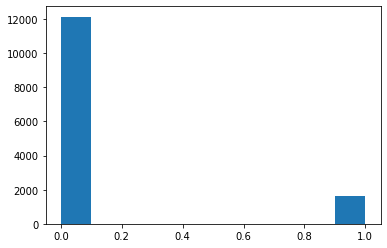

In [ ]:
plt.hist(df["viaje_noche_fuera"])

#Punto 3
## Estimación de los parámetros
### Visualización bivariada
#### En la gráfica número 1 se compara la probabilidad de que viaje o no y en las gráficas número 2,3,4 y 5 se compara la variable dependiente con la variable independiente

In [ ]:
viaje_noche_fuera = df['viaje_noche_fuera'].value_counts()

In [ ]:
viaje_noche_fuera

0    12140
1     1641
Name: viaje_noche_fuera, dtype: int64

In [ ]:
viaje_noche_fuera.index

Int64Index([0, 1], dtype='int64')

In [ ]:
viaje_noche_fuera.values

array([12140,  1641])

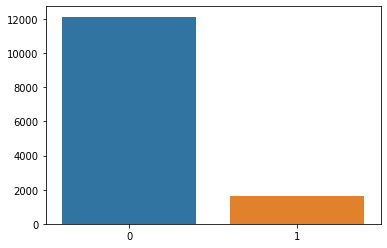

In [ ]:
import seaborn as sns
sns.barplot(x=viaje_noche_fuera.index, y=viaje_noche_fuera.values) #gráfica 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


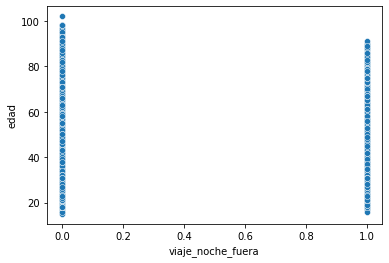

In [ ]:
sns.scatterplot(df['viaje_noche_fuera'],df['edad']) #gráfica 2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


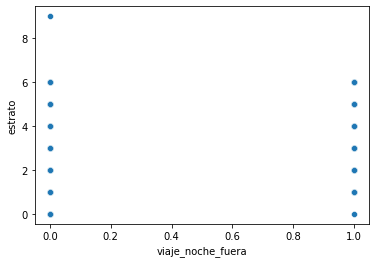

In [ ]:
sns.scatterplot(df['viaje_noche_fuera'],df['estrato']) #gráfica 3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


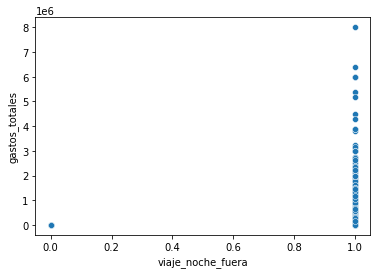

In [ ]:
sns.scatterplot(df['viaje_noche_fuera'],df['gastos_totales']) #gráfica 4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


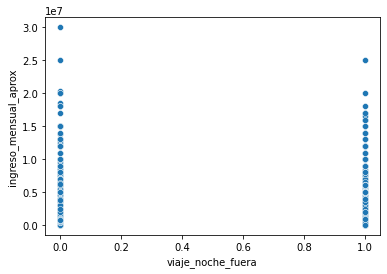

In [ ]:
sns.scatterplot(df['viaje_noche_fuera'],df['ingreso_mensual_aprox']) #gráfica 5

#Punto 4
## Análisis de resultados
### La probabilidad de que no viaje es mayor, debido a las variables que intervienen en la desición de viajar o no: edad, gastos totales, estrato e ingresos mensuales; como se evidencia en las gráficas la única variable que muestra mayor probabilidad de viajar son los gastos, mientras que las otras variables presentan mayor probabilidad de no viajar. 